In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('../datasets/hive-0.9.0.csv')

df.head()

,File,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,...,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE,HeuBug,HeuBugCount,RealBug,RealBugCount
0,ant/src/org/apache/hadoop/hive/ant/GetVersionP...,0,5,94,5,0,1,0,9,2,...,1.000000,0.0,0,1,0,0,False,0,False,0
1,ant/src/org/apache/hadoop/hive/ant/QTestGenTas...,0,6,376,31,0,1,0,74,2,...,0.553191,0.0,0,3,0,3,True,1,True,1
2,builtins/src/org/apache/hive/builtins/BuiltinU...,0,0,28,0,0,0,0,0,0,...,1.000000,1.0,0,1,1,0,False,0,False,0
3,builtins/src/org/apache/hive/builtins/UDAFUnio...,0,4,127,2,0,1,0,12,1,...,1.000000,1.0,0,1,1,0,False,0,False,0
4,cli/src/java/org/apache/hadoop/hive/cli/CliDri...,5,24,743,22,2,2,4,118,5,...,0.261104,0.6,0,7,3,6,False,0,False,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   File                       1416 non-null   object 
 1   CountDeclMethodPrivate     1416 non-null   int64  
 2   AvgLineCode                1416 non-null   int64  
 3   CountLine                  1416 non-null   int64  
 4   MaxCyclomatic              1416 non-null   int64  
 5   CountDeclMethodDefault     1416 non-null   int64  
 6   AvgEssential               1416 non-null   int64  
 7   CountDeclClassVariable     1416 non-null   int64  
 8   SumCyclomaticStrict        1416 non-null   int64  
 9   AvgCyclomatic              1416 non-null   int64  
 10  AvgLine                    1416 non-null   int64  
 11  CountDeclClassMethod       1416 non-null   int64  
 12  AvgLineComment             1416 non-null   int64  
 13  AvgCyclomaticModified      1416 non-null   int64

In [3]:
df = df.drop(columns=['HeuBug', 'HeuBugCount', 'RealBugCount'])

In [4]:
df.shape

(1416, 67)

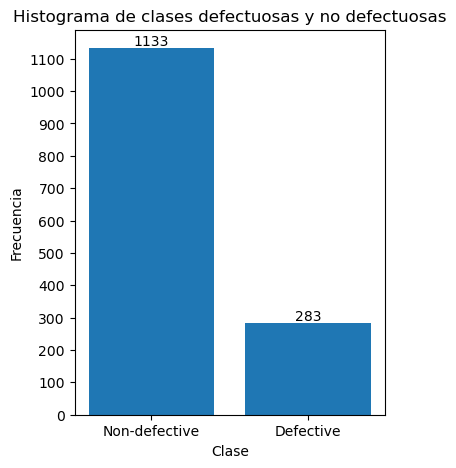

In [5]:
import matplotlib.pyplot as plt
#Defective and Non-defective Class histogram

# Count the occurrences of each class
class_counts = df['RealBug'].value_counts()

# Plot the histogram with increased height
plt.figure(figsize=(4, 5))
bars = plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Histograma de clases defectuosas y no defectuosas')
plt.xticks([0, 1], ['Non-defective', 'Defective'])

# show more numbers in frequency (y axis)
plt.gca().set_yticks(range(0, class_counts.max() + 50, 100))

# Add value labels on top of bars
plt.bar_label(bars, labels=[f'{val}' for val in class_counts.values])

# show the grid
# plt.grid(axis='y')
plt.show()


In [6]:
class_counts

RealBug
False    1133
True      283
Name: count, dtype: int64

<Axes: xlabel='RealBug', ylabel='CountLineCode'>

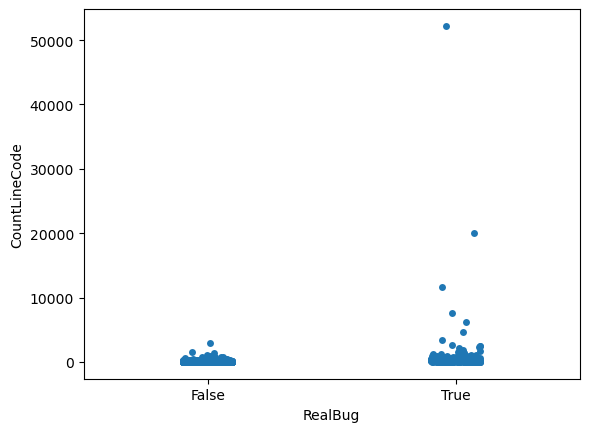

In [7]:
# Dispersion plot of class Defective
import seaborn as sns

sns.stripplot(x='RealBug', y='CountLineCode', data=df, jitter=True)

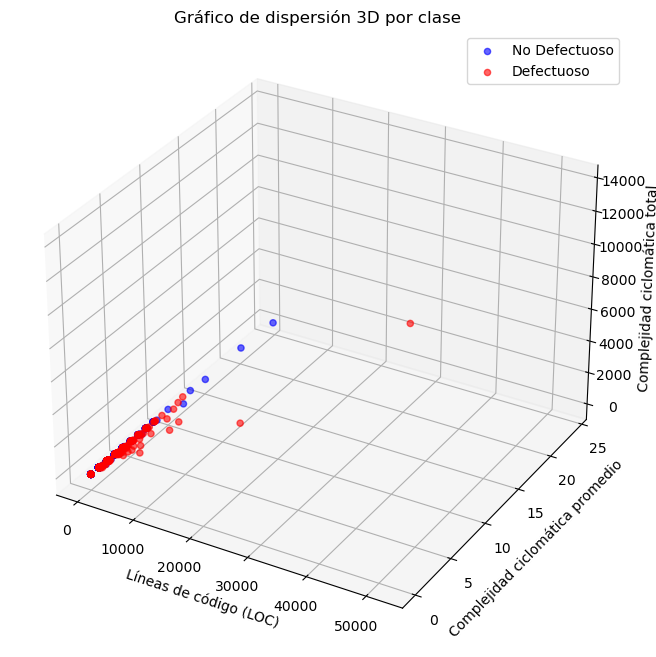

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Separar por clase
defective = df[df['RealBug'] == 1]
non_defective = df[df['RealBug'] == 0]

# Graficar cada clase con diferente color
ax.scatter(non_defective['CountLineCode'], 
           non_defective['AvgCyclomatic'], 
           non_defective['SumCyclomatic'],
           c='blue', label='No Defectuoso', alpha=0.6)

ax.scatter(defective['CountLineCode'], 
           defective['AvgCyclomatic'], 
           defective['SumCyclomatic'],
           c='red', label='Defectuoso', alpha=0.6)

ax.set_xlabel('Líneas de código (LOC)')
ax.set_ylabel('Complejidad ciclomática promedio')
ax.set_zlabel('Complejidad ciclomática total')
ax.set_title('Gráfico de dispersión 3D por clase')
ax.legend()

plt.show()

## Preprocesamiento

- isNull / Missing values
- Duplicados
- Outlaiers ( no porque el metodo HCBOU de balanceo no lo recomienda)
- Particion Train/Test
- Transformación de los datos - Normalización/Estandarización (StandarScaler)
- Balanceo de clases - HCBOU
- Seleccion de caracteristicas (arbol de decision - CABOOST) 
- Reduccion de Dimensionalidad (PCA)

### Missing Values

In [9]:
df.isnull().sum()

File                      0
CountDeclMethodPrivate    0
AvgLineCode               0
CountLine                 0
MaxCyclomatic             0
                         ..
MINOR_COMMIT              0
MINOR_LINE                0
MAJOR_COMMIT              0
MAJOR_LINE                0
RealBug                   0
Length: 67, dtype: int64

### Duplicated

In [10]:
df.duplicated().sum()

0

### Split Train/Test 80/20

In [11]:
# split train and test
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RealBug'])
y = df['RealBug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
print(X_train.shape)
print(X_test.shape)

(1132, 66)
(284, 66)


### Normalización

In [13]:
from sklearn.preprocessing import StandardScaler

X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_train_numeric_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_train_numeric.columns)

In [14]:
X_train_numeric.describe()

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,ADEV,DDEV,Added_lines,Del_lines,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,...,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,1.058304,8.772085,287.386926,5.324205,0.450530,1.223498,1.785336,47.128092,2.085689,11.300353,...,0.541519,0.382509,29.327739,15.278269,0.785647,0.221667,0.001767,2.087456,0.380742,0.749117
std,8.311899,10.145066,1996.488974,8.229576,4.062534,1.083782,22.580024,464.198510,1.881242,12.406819,...,1.597702,0.769313,265.052462,200.662024,0.224749,0.391546,0.042015,1.232604,0.758623,1.486381
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.209256,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,51.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.601923,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,5.000000,89.500000,2.000000,0.000000,1.000000,0.000000,8.500000,2.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.864865,0.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,11.000000,207.000000,6.000000,0.000000,1.000000,1.000000,26.000000,3.000000,15.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.381250,0.000000,3.000000,1.000000,1.000000
max,257.000000,92.000000,63702.000000,145.000000,128.000000,21.000000,752.000000,15035.000000,24.000000,115.000000,...,28.000000,6.000000,8331.000000,6275.000000,1.000000,1.000000,1.000000,7.000000,5.000000,13.000000


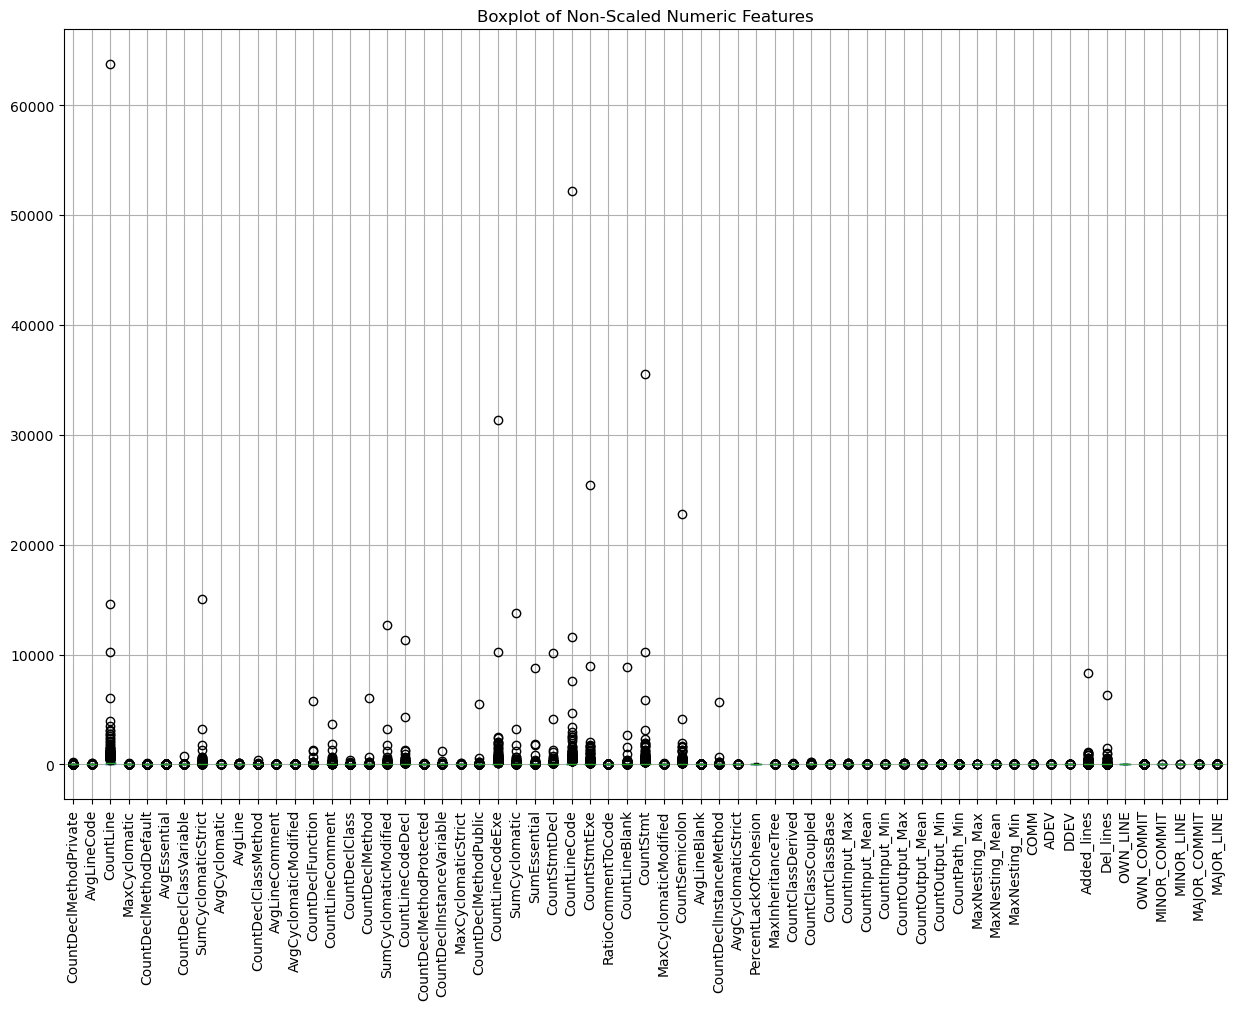

In [15]:
plt.figure(figsize=(15, 10))
X_train_numeric.drop(columns=['CountPath_Max', 'CountPath_Mean']).boxplot()
plt.title('Boxplot of Non-Scaled Numeric Features')
plt.xticks(rotation=90)
plt.show()

In [16]:
X_train_numeric_scaled.describe()

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,ADEV,DDEV,Added_lines,Del_lines,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE
count,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03,1132.000000,1.132000e+03,1.132000e+03,...,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03
mean,6.276879e-18,-1.883064e-17,4.707659e-18,1.490759e-17,2.196908e-17,-3.766128e-17,6.276879e-18,0.000000,-7.846099e-17,-5.963035e-17,...,5.335347e-17,1.412298e-17,-1.255376e-17,-4.707659e-18,2.636289e-16,7.846099e-17,-6.276879e-18,-1.883064e-16,9.415319e-18,-7.061489e-18
std,1.000442e+00,1.000442e+00,1.000442e+00,1.000442e+00,1.000442e+00,1.000442e+00,1.000442e+00,1.000442,1.000442e+00,1.000442e+00,...,1.000442e+00,1.000442e+00,1.000442e+00,1.000442e+00,1.000442e+00,1.000442e+00,1.000442e+00,1.000442e+00,1.000442e+00,1.000442e+00
min,-1.273802e-01,-8.650473e-01,-1.435087e-01,-6.472458e-01,-1.109478e-01,-1.129414e+00,-7.910199e-02,-0.101571,-1.109167e+00,-9.112205e-01,...,-3.390863e-01,-4.974282e-01,-1.106977e-01,-7.617297e-02,-2.565732e+00,-5.663843e-01,-4.207032e-02,-8.826328e-01,-5.021077e-01,-5.042098e-01
25%,-1.273802e-01,-5.692063e-01,-1.184537e-01,-5.256791e-01,-1.109478e-01,-2.063117e-01,-7.910199e-02,-0.095105,-5.773681e-01,-5.886747e-01,...,-3.390863e-01,-4.974282e-01,-1.106977e-01,-7.617297e-02,-8.178220e-01,-5.663843e-01,-4.207032e-02,-8.826328e-01,-5.021077e-01,-5.042098e-01
50%,-1.273802e-01,-3.719790e-01,-9.916127e-02,-4.041125e-01,-1.109478e-01,-2.063117e-01,-7.910199e-02,-0.083251,-4.556933e-02,-3.467653e-01,...,-3.390863e-01,-4.974282e-01,-1.106977e-01,-7.617297e-02,3.526301e-01,-5.663843e-01,-4.207032e-02,-7.098346e-02,-5.021077e-01,-5.042098e-01
75%,-1.273802e-01,2.197028e-01,-4.028194e-02,8.215414e-02,-1.109478e-01,-2.063117e-01,-3.479548e-02,-0.045535,4.862294e-01,2.983264e-01,...,2.870894e-01,8.030076e-01,-1.069232e-01,-7.617297e-02,9.541670e-01,4.077513e-01,-4.207032e-02,7.406659e-01,8.166531e-01,1.688627e-01
max,3.080581e+01,8.207408e+00,3.177711e+01,1.697992e+01,3.141041e+01,1.825573e+01,3.323939e+01,32.301905,1.165400e+01,8.361973e+00,...,1.719383e+01,7.305186e+00,3.133471e+01,3.120914e+01,9.541670e-01,1.988726e+00,2.376973e+01,3.987263e+00,6.091696e+00,8.245733e+00


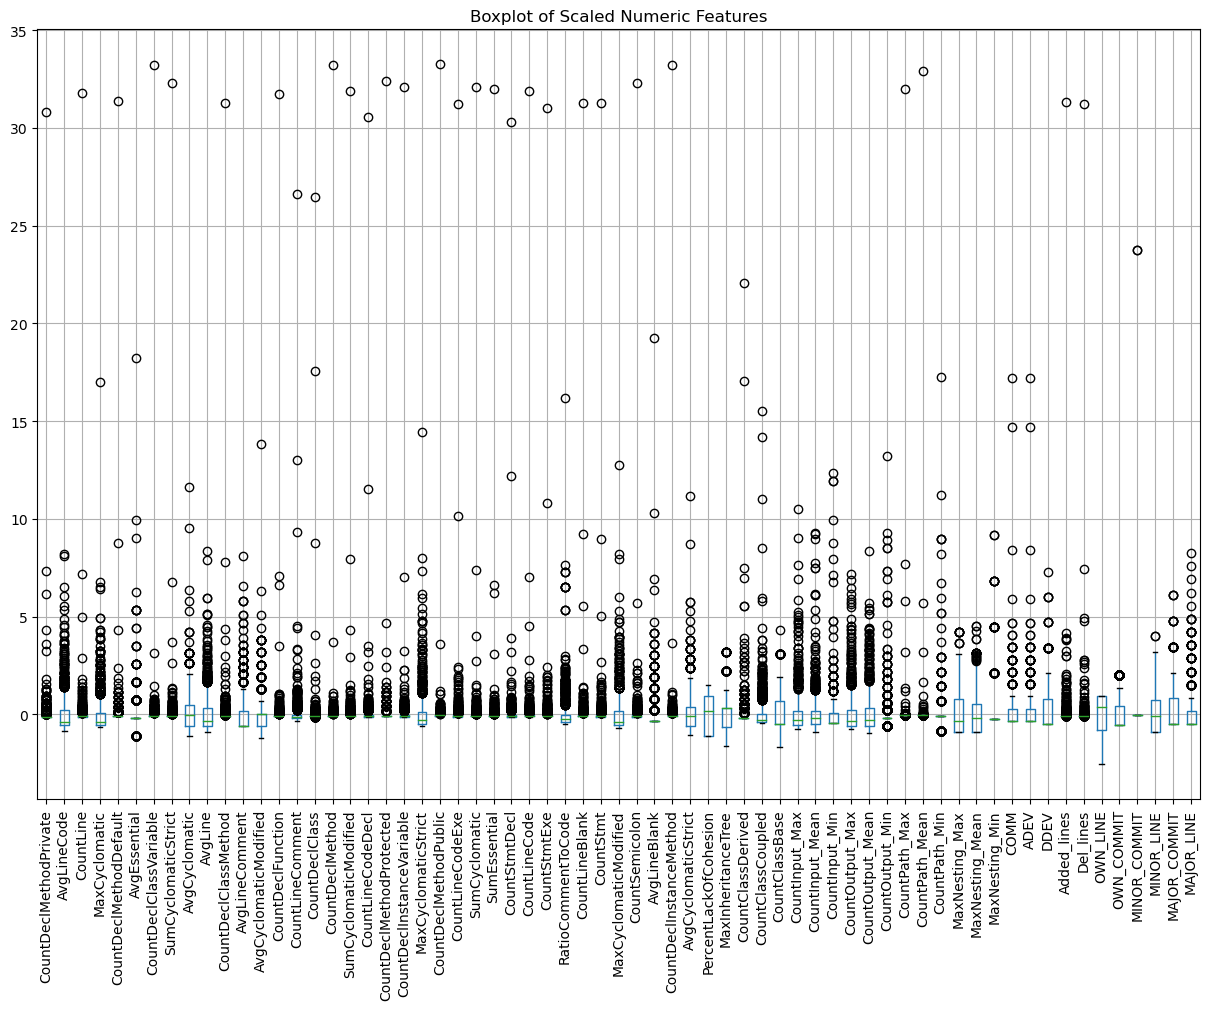

In [17]:
plt.figure(figsize=(15, 10))
X_train_numeric_scaled.boxplot()
plt.title('Boxplot of Scaled Numeric Features')
plt.xticks(rotation=90)
plt.show()